Учебная часть школы запросила отчет о результатах экзаменов, в котором необходимо сравнить баллы учеников для разных групп (пол учащегося, расовая принадлежность, уровень образования родителей, наличие льготного питания). 
Также требуется сделать заключение о целесообразности проведения подготовительных курсов для разных групп.

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем датасет, проверяем типы данных, пропущенные значения, дубликаты, смотрим описательную статистику числовых переменных.

In [2]:
grades = pd.read_csv('exams datacamp.csv')
grades.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Информация о столбцах:
* "gender" - пол ученика (male / female);
* "race/ethnicity" - принадлежность к этнической группе;
* "parent_education_level" - самый высокий уровень образования одного из родителей;
* "lunch" - получает ли ученик бесплатный обед;
* "test_prep_course" - окончил ли ученик подготовительный курс;
* "math" - экзаменационная оценка по математике;
* "reading" - экзаменационная оценка по чтению;
* "writing" - экзаменационная оценка по письму.

In [3]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
grades.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
print('Количество пропущенных значений в столбцах')
grades.isna().sum()

Количество пропущенных значений в столбцах


gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
reading                   0
writing                   0
dtype: int64

In [6]:
print(f'Датасет содержит {grades.duplicated().sum()} дубликатов')

Датасет содержит 0 дубликатов


Посмотрим, какие значения принимают столбцы, которые мы будем применять для группировок

In [7]:
def unique_values(data):
    for column in data.columns:
        if data[column].nunique() < 10:
            print(f'Уникальные значения столбца {column}:', end=' ')
            print(*data[column].unique(), sep=', ')

In [8]:
unique_values(grades)

Уникальные значения столбца gender: female, male
Уникальные значения столбца race/ethnicity: group B, group C, group A, group D, group E
Уникальные значения столбца parent_education_level: bachelor's degree, some college, master's degree, associate's degree, high school, some high school
Уникальные значения столбца lunch: standard, free/reduced
Уникальные значения столбца test_prep_course: none, completed


Изменим тип столбца parent_education_level и упорядочим ступени образования. Для race/ethnicity добавим порядок для лучшей визуализации.

In [9]:
grades['parent_education_level'] = pd.Categorical(grades['parent_education_level'])
grades['parent_education_level'] = grades['parent_education_level'].cat.reorder_categories(['high school', 'some high school', 
                                                                                          'some college', 'associate\'s degree',
                                                                                          'bachelor\'s degree', 'master\'s degree'],
                                                                                           ordered=True)
grades['race/ethnicity'] = pd.Categorical(grades['race/ethnicity'])
grades['race/ethnicity'] = grades['race/ethnicity'].cat.reorder_categories(['group A', 'group B','group C','group D','group E'],
                                                                            ordered=True)

Добавим средний балл и оценки за предметы

In [10]:
grades['average'] = round(grades[['math', 'writing', 'reading']].mean(axis=1), 2)
grades.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [11]:
def grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

In [12]:
subjects = ['math', 'reading', 'writing', 'average']
for subject in subjects:
    grades[f'{subject}_grade'] = grades[subject].apply(grade)

In [13]:
grades.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing,average,math_grade,reading_grade,writing_grade,average_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,C,C,C,C
1,female,group C,some college,standard,completed,69,90,88,82.33,D,A,B,B
2,female,group B,master's degree,standard,none,90,95,93,92.67,A,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,F,F,F,F
4,male,group C,some college,standard,none,76,78,75,76.33,C,C,C,C


Проверим, имеется ли корреляция между оценками

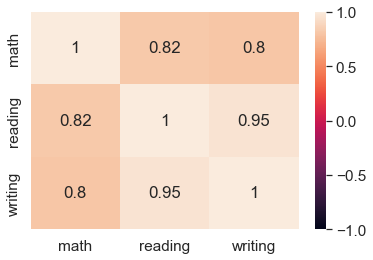

In [40]:
sns.heatmap(grades[['math', 'reading', 'writing']].corr(), vmin=-1, vmax=1,annot=True)
plt.show()

Имеется высокая корреляция между math и writing, math и reading и очень высокая кореляция между reading и writing

## Gender

Оценим распределение оценок в зависимости от пола

In [14]:
def hists(data, column):
    fig, ax = plt.subplots(2, 2, figsize=(14,10))
    sns.kdeplot(x = 'math', data=data, ax=ax[0][0], hue=column, palette=['plum', 'teal'])
    sns.kdeplot(x = 'reading', data=data, ax=ax[0][1], hue=column, palette=['plum', 'teal'])
    sns.kdeplot(x = 'writing', data=data, ax=ax[1][0], hue=column, palette=['plum', 'teal'])
    sns.kdeplot(x = 'average', data=data, ax=ax[1][1], hue=column, palette=['plum', 'teal'])
    plt.suptitle(f'Распределение оценок по предметам в зависимости от {column}', size=16)
    plt.show()

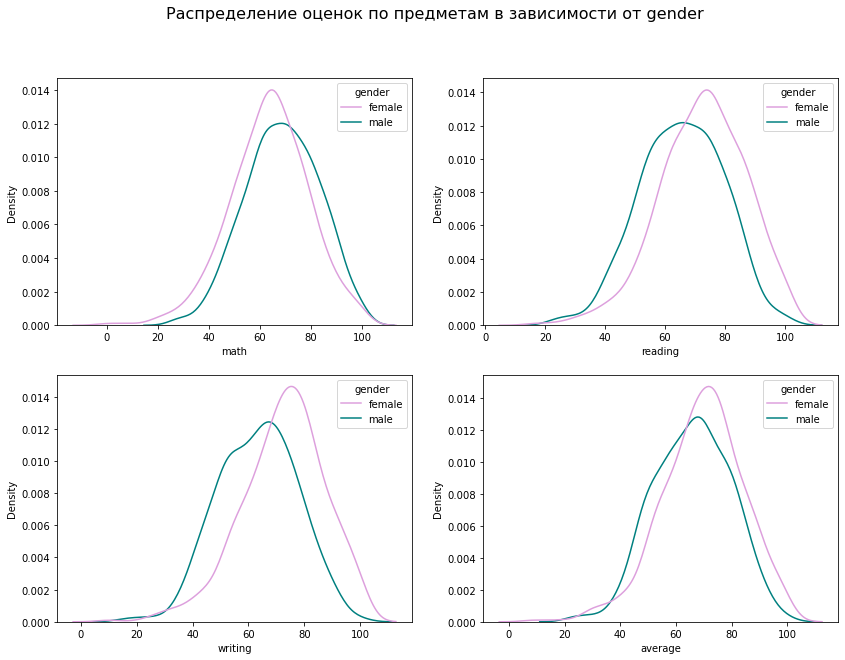

In [15]:
hists(grades, 'gender')

По предмету math учащиеся мужского пола получают более высокий балл.
По предметам reading и writing лучше оценки у учащихся  женского пола.

Проверим, влияет ли прохождение подготовительного курса на результаты внутри разных гендерных групп

In [16]:
def violin_course_gender(subject):
    sns.catplot(y='test_prep_course', x=subject, data=grades, col='gender',
                kind='violin', col_wrap=3, palette=sns.color_palette(['teal', 'darkorchid']))
    plt.show()

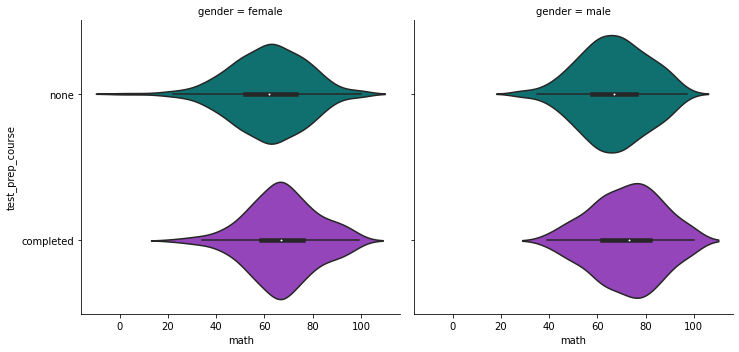

In [17]:
violin_course_gender('math')

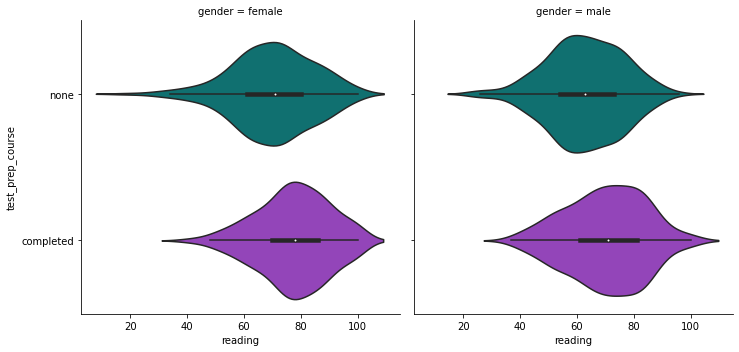

In [18]:
violin_course_gender('reading')

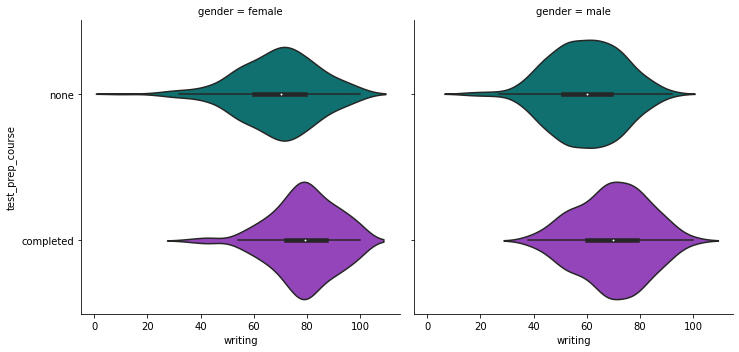

In [19]:
violin_course_gender('writing')

Ученики обоих полов в среднем сдают экзамены лучше после подготовительных курсов

## Lunch

Посмотрим на распределение оценок в зависимости от того, получает ли учащийся льготное питание.

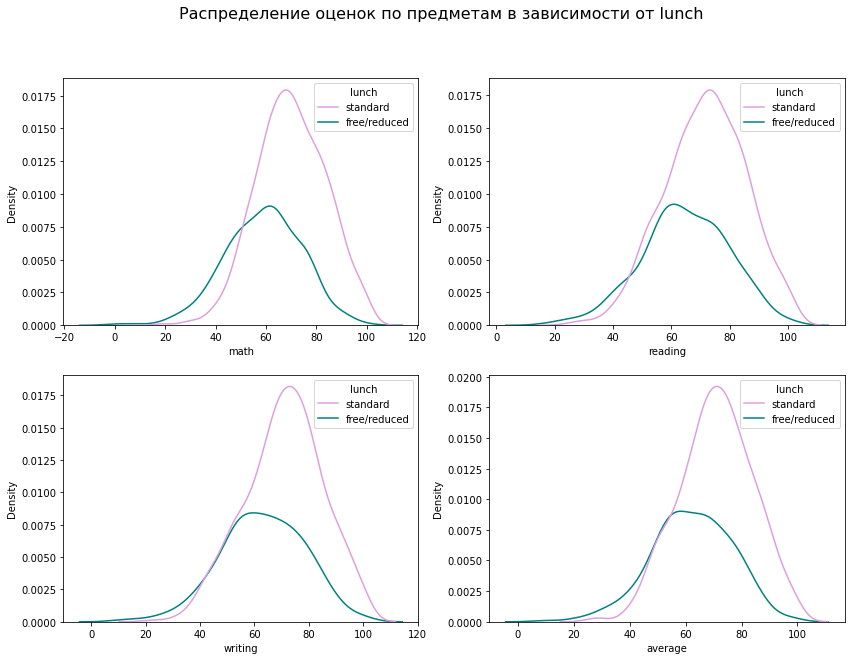

In [20]:
hists(grades, 'lunch')

Дети, получающие стандартное питание, сдают экзамены лучше, чем дети с льготным питанием.

## Parent_education_level

Сравним средние оценки по предметам в зависимости от образования родителей и этнической группы

In [21]:
def barplots(data, column):
    fig, ax = plt.subplots(2, 2, figsize=(14,12))
    sns.barplot(x='math', y=column, data=data, ax=ax[0][0])
    sns.barplot(x='reading', y=column, data=data, ax=ax[0][1])
    sns.barplot(x='writing', y=column, data=data, ax=ax[1][0])
    sns.barplot(x='average', y=column, data=data, ax=ax[1][1])
    plt.suptitle(f'Средние баллы по предметам в зависимости от {column}', size=16)
    ax[0][1].set(yticklabels=[])
    ax[0][1].set(ylabel=None)
    ax[1][1].set(yticklabels=[])
    ax[1][1].set(ylabel=None)
    plt.show()

In [22]:
parents = grades.groupby('parent_education_level')[subjects].mean()
parents

,math,reading,writing,average
parent_education_level,,,,
high school,62.137755,64.704082,62.448980,63.097194
some high school,63.497207,66.938547,64.888268,65.107654
some college,67.128319,69.460177,68.840708,68.476106
associate's degree,67.882883,70.927928,69.896396,69.568964
bachelor's degree,69.389831,73.000000,73.381356,71.923983
master's degree,69.745763,75.372881,75.677966,73.598644


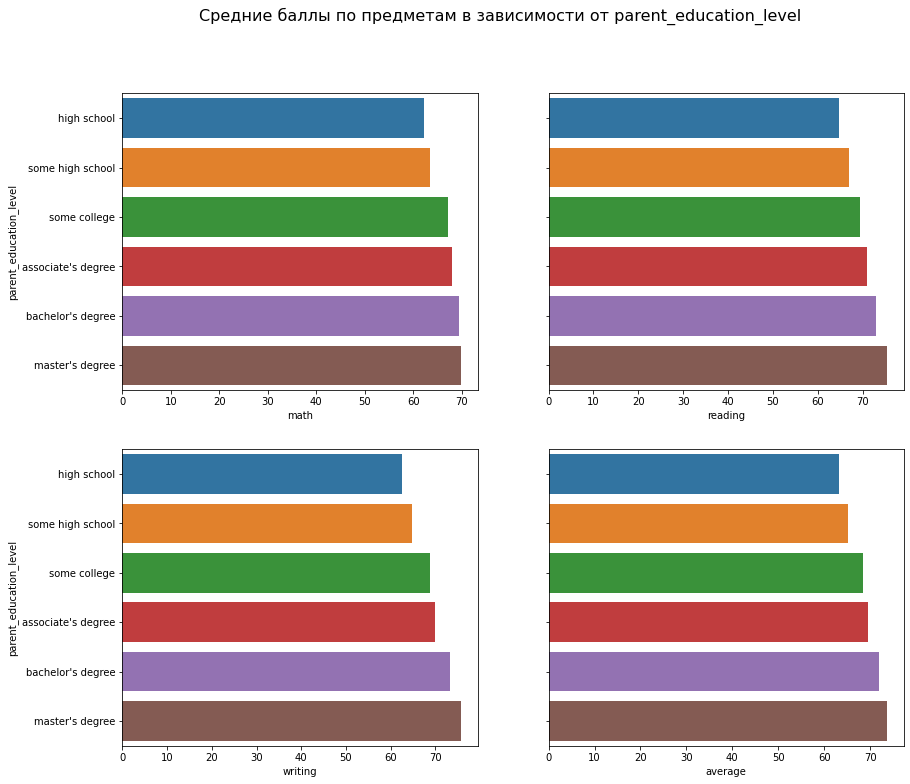

In [23]:
barplots(parents.reset_index(), 'parent_education_level')

In [24]:
def heatmaps(column):    
    fig,ax = plt.subplots(2, 2, figsize=(14,10))
    sns. set(font_scale=1.4)
    sns.heatmap(grades.groupby([column, 'math_grade']).size().unstack().apply(lambda x: 100*x/x.sum(), axis=1),
                ax=ax[0][0], annot=True, vmin=0, vmax=50)
    ax[0][0].set_title('Math grades')
    sns.heatmap(grades.groupby([column, 'reading_grade']).size().unstack().apply(lambda x: 100*x/x.sum(), axis=1),
                ax=ax[0][1], annot=True, vmin=0, vmax=50)
    ax[0][1].set_title('Reading grades')
    sns.heatmap(grades.groupby([column, 'writing_grade']).size().unstack().apply(lambda x: 100*x/x.sum(), axis=1),
                ax=ax[1][0], annot=True, vmin=0, vmax=50)
    ax[1][0].set_title('Writing grades')
    sns.heatmap(grades.groupby([column, 'average_grade']).size().unstack().apply(lambda x: 100*x/x.sum(), axis=1),
                ax=ax[1][1], annot=True, vmin=0, vmax=50)
    ax[1][1].set_title('Average grades')
    ax[0][1].set(yticklabels=[])
    ax[0][1].set(ylabel=None)
    ax[1][1].set(yticklabels=[])
    ax[1][1].set(ylabel=None)
    ax[1][0].set(xlabel=None)
    ax[0][1].set(xlabel=None)
    ax[1][1].set(xlabel=None)
    ax[0][0].set(xlabel=None)
    plt.suptitle(f'Процентное распределение оценок для каждой группы {column}')
    plt.show()

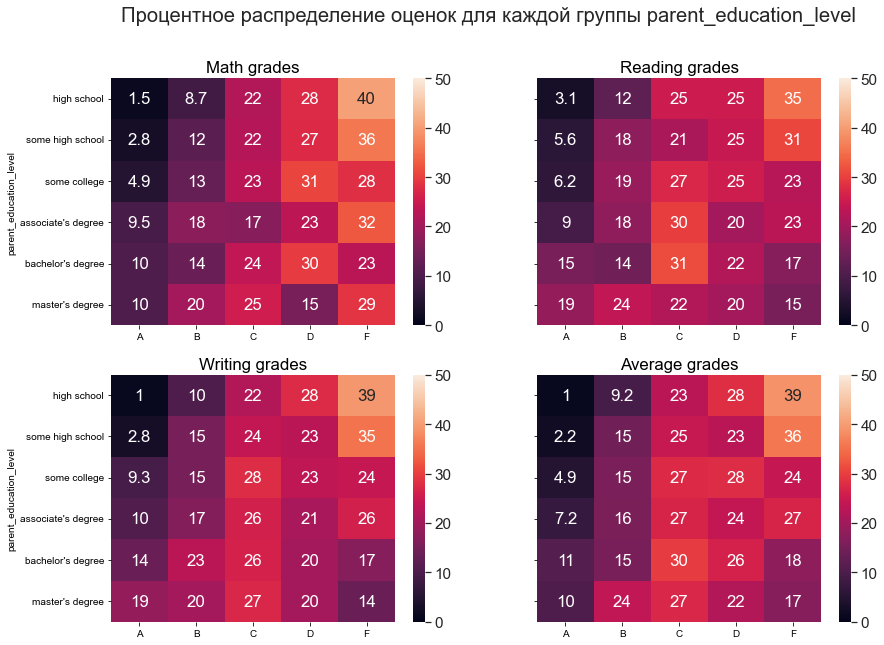

In [25]:
heatmaps('parent_education_level')

Дети, чьи родители имеют высшее образование, сдают экзамены лучше.

## Race/ethnicity

In [26]:
races = grades.groupby('race/ethnicity')[subjects].mean()
races

,math,reading,writing,average
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992135
group B,63.452632,67.352632,65.600000,65.468579
group C,64.463950,69.103448,67.827586,67.131567
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752000


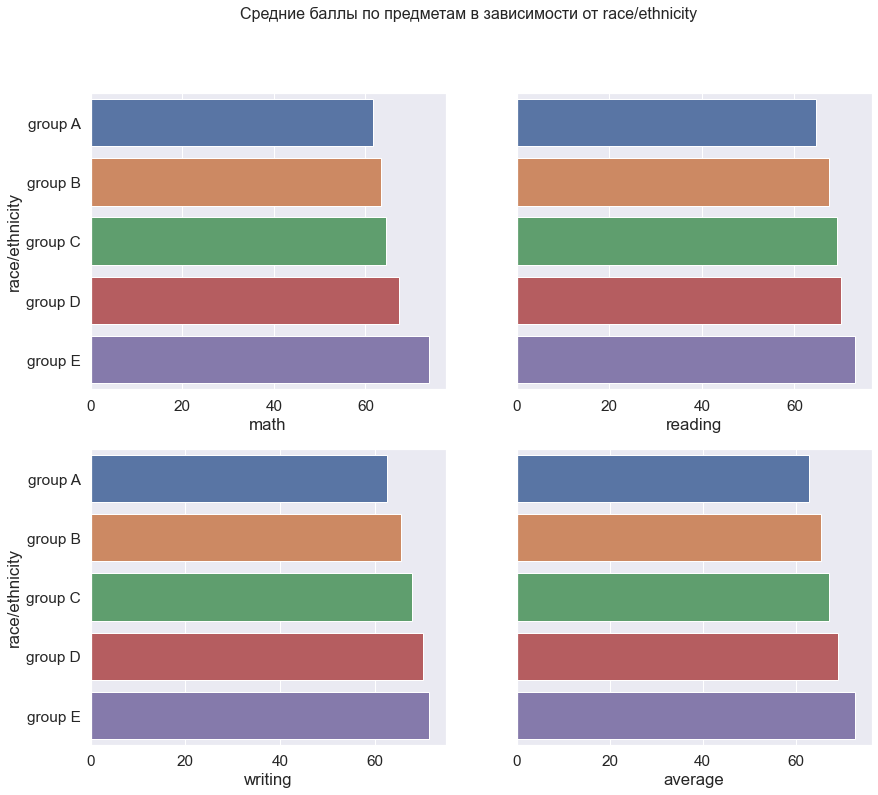

In [27]:
barplots(races.reset_index(), 'race/ethnicity')

In [28]:
grades.groupby(['race/ethnicity', 'math_grade']).size().unstack().apply(lambda x: 100*x/x.sum(), axis=1)

math_grade,A,B,C,D,F
race/ethnicity,,,,,
group A,4.494382,5.617978,17.977528,24.719101,47.191011
group B,4.210526,11.052632,18.947368,28.421053,37.368421
group C,5.015674,10.344828,19.435737,29.780564,35.423197
group D,3.053435,16.412214,25.572519,27.480916,27.480916
group E,15.714286,23.571429,25.000000,17.857143,17.857143


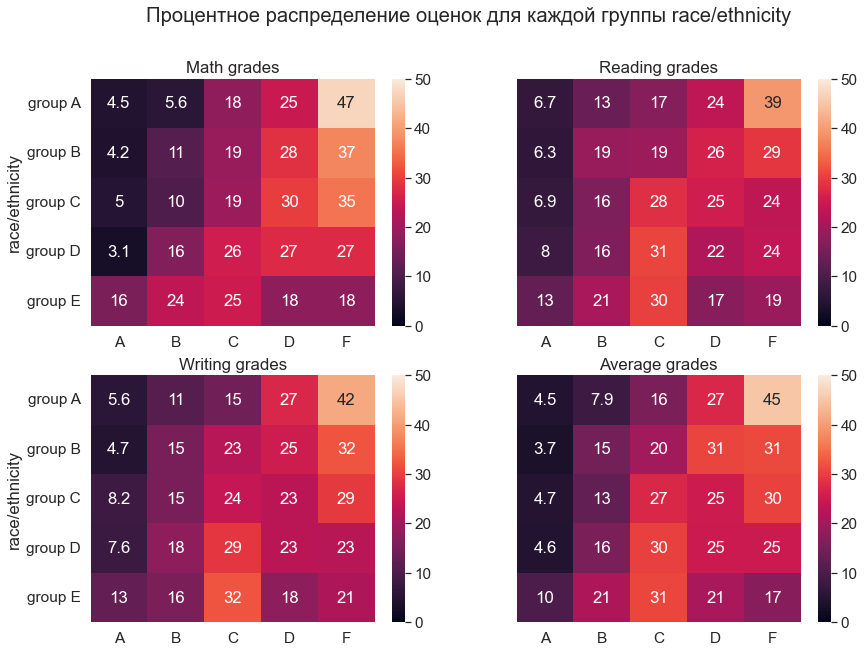

In [29]:
heatmaps('race/ethnicity')

Ученики из разных этнических принадлежностей имеют разные оценки.

In [30]:
def violin_course_parents(subject):
    sns.catplot(y='test_prep_course', x=subject, data=grades, col='parent_education_level',
                kind='violin', col_wrap=3, palette=sns.color_palette(['teal', 'darkorchid']))
    plt.show()

Распределение оценок для предмета math в зависимости от ступени образования родителей и окончания подготовительного курса

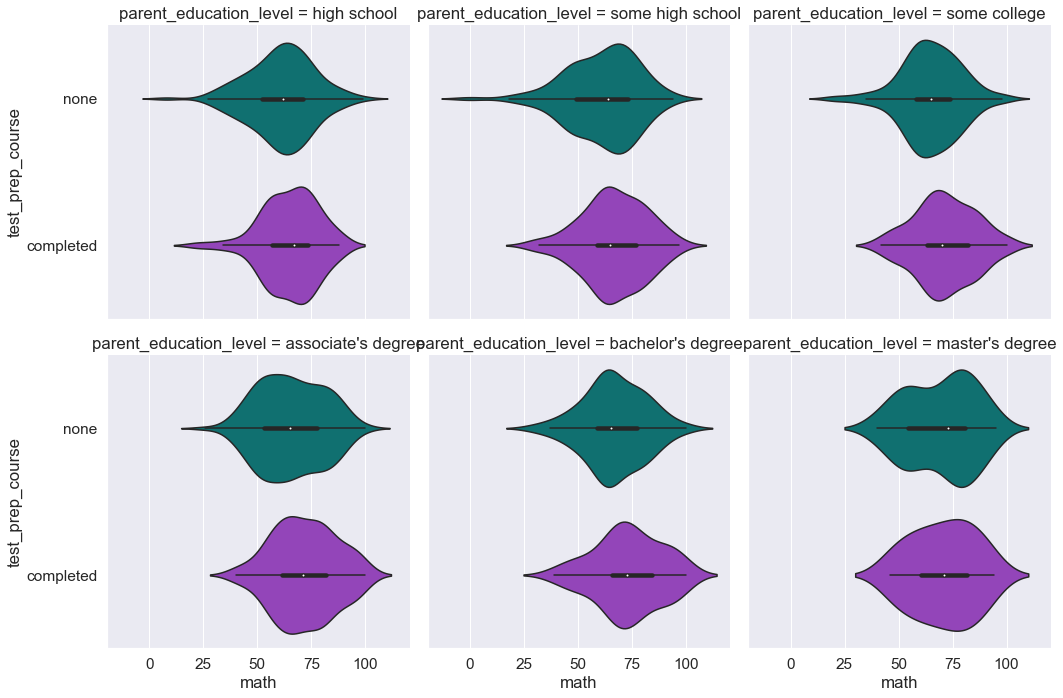

In [31]:
violin_course_parents('math')

Распределение оценок для предмета reading в зависимости от ступени образования родителей и окончания подготовительного курса

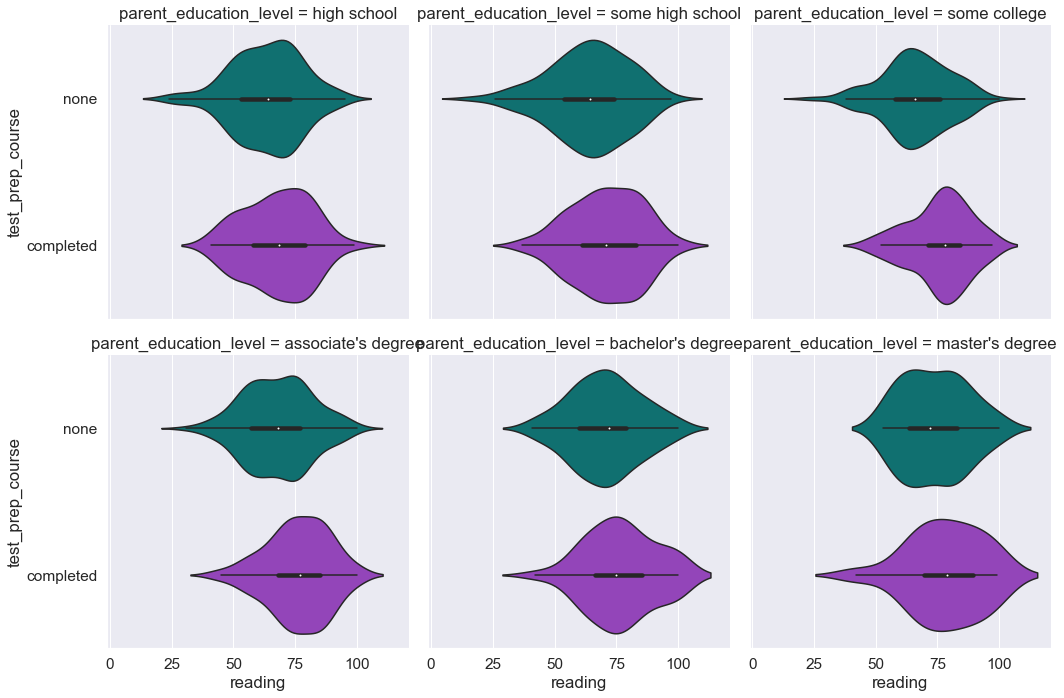

In [32]:
violin_course_parents('reading')

Распределение оценок для предмета writing в зависимости от ступени образования родителей и окончания подготовительного курса

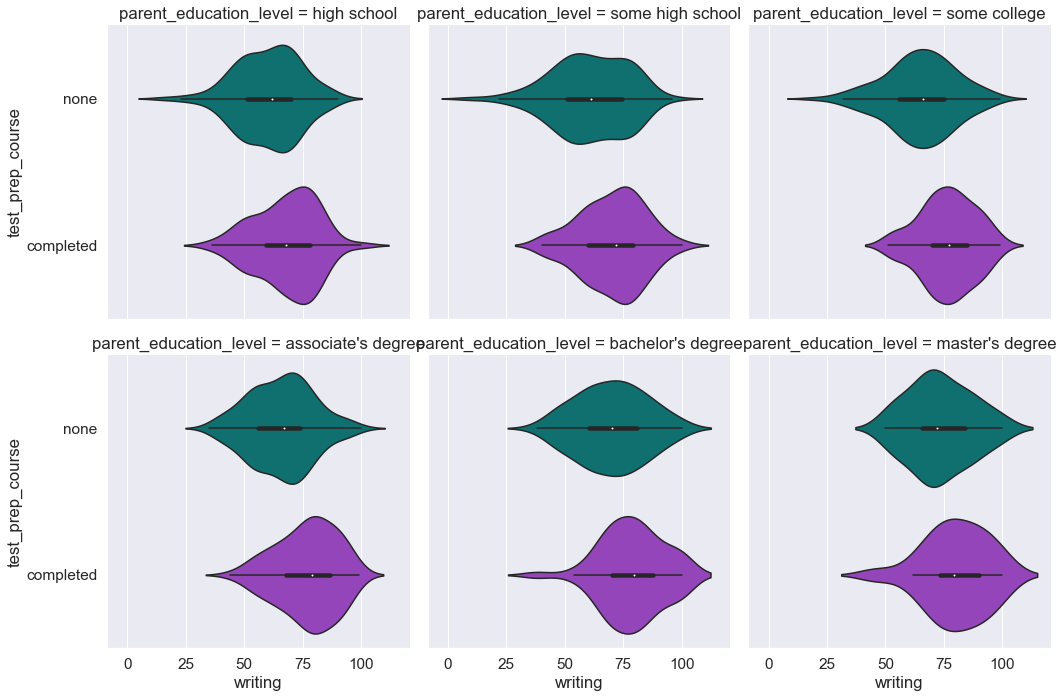

In [33]:
violin_course_parents('writing')

In [34]:
def violin_course_race(subject):
    sns.catplot(y='test_prep_course', x=subject, data=grades, col='race/ethnicity',
                kind='violin', col_wrap=3, palette=sns.color_palette(['salmon', 'teal']))
    plt.show()

Распределение оценок для предмета math в зависимости от этнической группы и окончания подготовительного курса

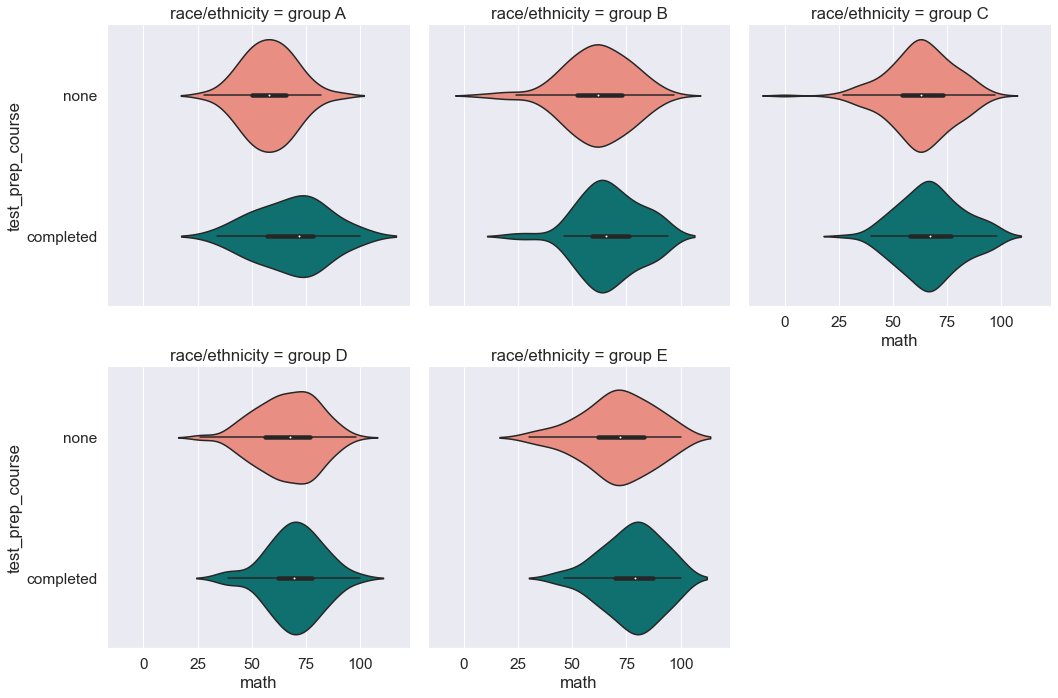

In [35]:
violin_course_race('math')

Распределение оценок для предмета reading в зависимости от этнической группы и окончания подготовительного курса

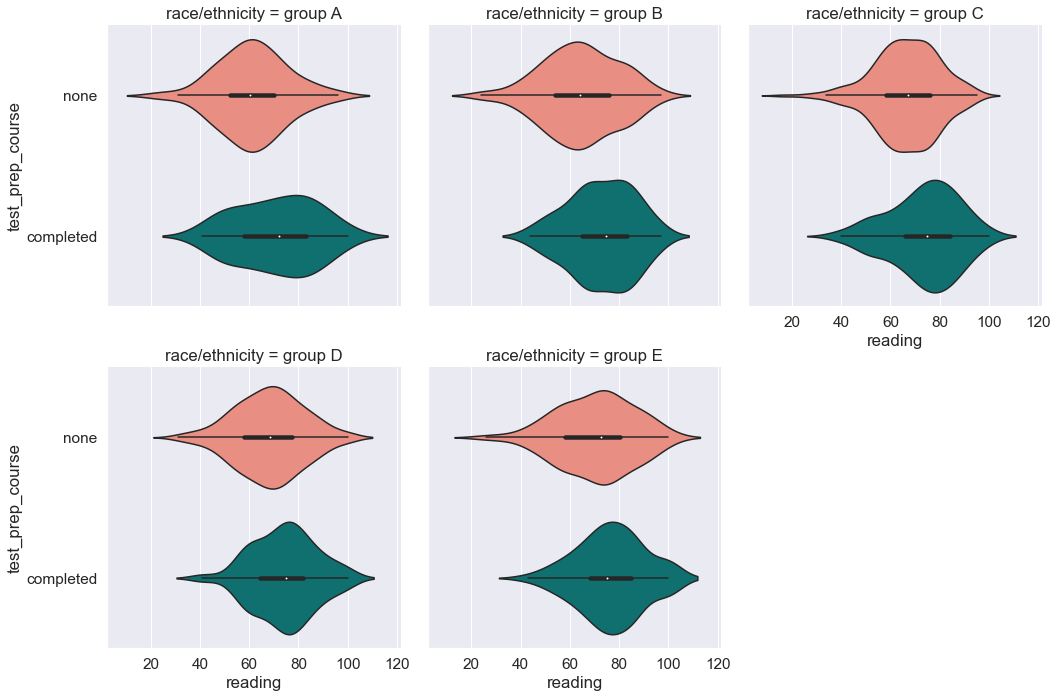

In [36]:
violin_course_race('reading')

Распределение оценок для предмета writing в зависимости от этнической группы и окончания подготовительного курса

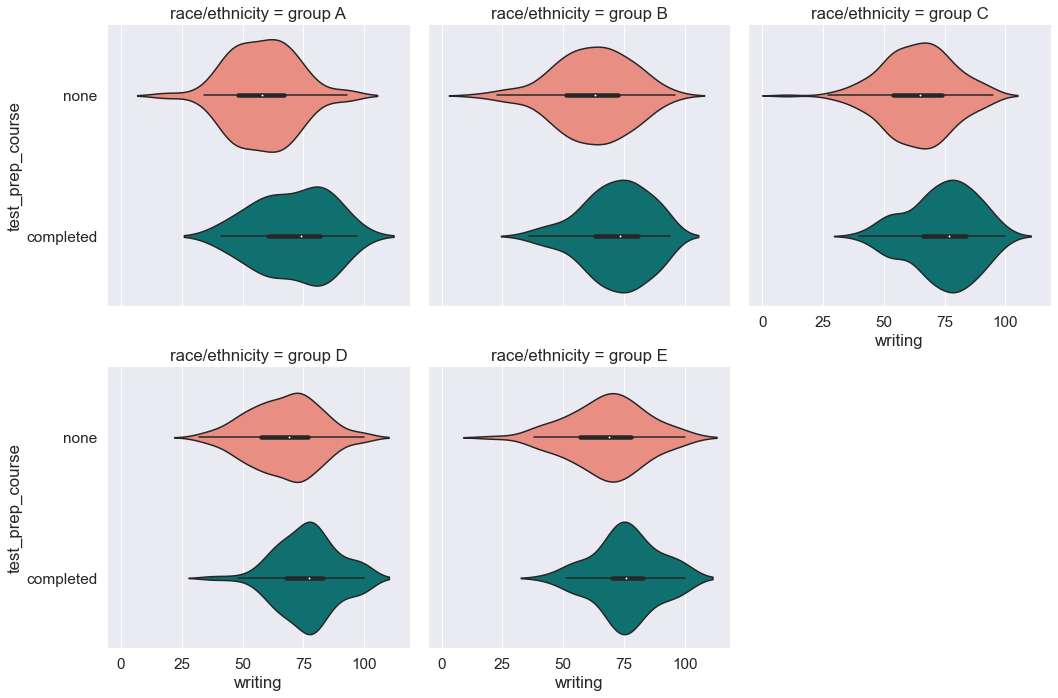

In [37]:
violin_course_race('writing')

**Вывод:** окончание подготовительного курса положительно влияет на результат для обоих гендеров, во всех этнических группах и для разных ступеней образования родителей учащихся.